 Explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    trade_data = pd.read_csv(r'C:\Users\narra\OneDrive\Desktop\projects\Data Analytics\Stock_Market\historical_data (1).csv')
    sentiment_data = pd.read_csv(r'C:\Users\narra\OneDrive\Desktop\projects\Data Analytics\Stock_Market\fear_greed_index (1).csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure you have uploaded both 'historical_data.csv' and 'fear_greed_index.csv' to your Colab environment.")

In [3]:
trade_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1730000000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1730000000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,1730000000000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,1730000000000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,1730000000000


In [4]:
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Preprocessing Trade data


In [5]:
trade_data['Timestamp IST'] = pd.to_datetime(trade_data['Timestamp IST'], errors='coerce')

trade_data['Trade Date'] = trade_data['Timestamp IST'].dt.date

trade_data['Closed PnL'] = pd.to_numeric(trade_data['Closed PnL'], errors='coerce')

trade_data.dropna(subset=['Trade Date', 'Closed PnL'], inplace=True)

In [6]:
trade_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Trade Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1730000000000,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1730000000000,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,1730000000000,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,1730000000000,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,1730000000000,2024-02-12


Pre Processing Sentiment Data

In [7]:
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')

sentiment_data.rename(columns={'date': 'Trade Date', 'value': 'Sentiment Score', 'classification': 'Sentiment'}, inplace=True)

sentiment_data['Trade Date'] = sentiment_data['Trade Date'].dt.date

In [8]:
sentiment_data.head()

,timestamp,Sentiment Score,Sentiment,Trade Date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Merging Data Sets

In [9]:
merged_df = pd.merge(trade_data, sentiment_data, on='Trade Date', how='left')
merged_df.dropna(subset=['Sentiment'], inplace=True)
print(merged_df[['Trade Date', 'Coin', 'Side', 'Closed PnL', 'Sentiment', 'Sentiment Score']].head())

   Trade Date  Coin Side  Closed PnL Sentiment  Sentiment Score
0  2024-02-12  @107  BUY         0.0     Greed             70.0
1  2024-02-12  @107  BUY         0.0     Greed             70.0
2  2024-02-12  @107  BUY         0.0     Greed             70.0
3  2024-02-12  @107  BUY         0.0     Greed             70.0
4  2024-02-12  @107  BUY         0.0     Greed             70.0


Analysing data using grid

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

Analysing average profit or lose by sentiment analysis

In [11]:
pnl_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean().sort_values()
print(pnl_by_sentiment)

Sentiment
Extreme Fear       1.891632
Neutral           27.088803
Greed             53.988003
Fear             128.287950
Extreme Greed    205.816345
Name: Closed PnL, dtype: float64


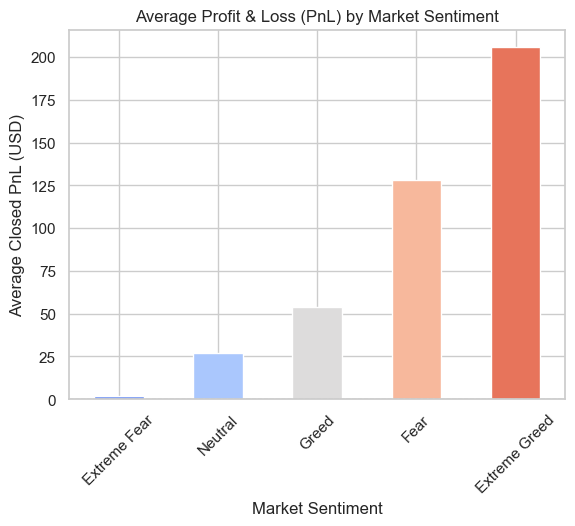

In [12]:
pnl_by_sentiment.plot(kind='bar', color=sns.color_palette("coolwarm", len(pnl_by_sentiment)))
plt.title('Average Profit & Loss (PnL) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL (USD)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')



*   Extreme Greed and Fear give the best average returns. Neutral and normal Greed give the worst.
*   Trade when sentiment is very low or very high.
*   Reduce trading in neutral times.



Analysing PnL by trade and sentiment

In [13]:
pnl_by_side_sentiment = merged_df.groupby(['Sentiment', 'Side'])['Closed PnL'].mean().unstack()
print(pnl_by_side_sentiment)

Side                  BUY        SELL
Sentiment                            
Extreme Fear    -3.248825    7.076480
Extreme Greed    9.047055  288.350131
Fear           210.426466   36.824047
Greed           15.661324   89.201657
Neutral         12.484274   35.669805


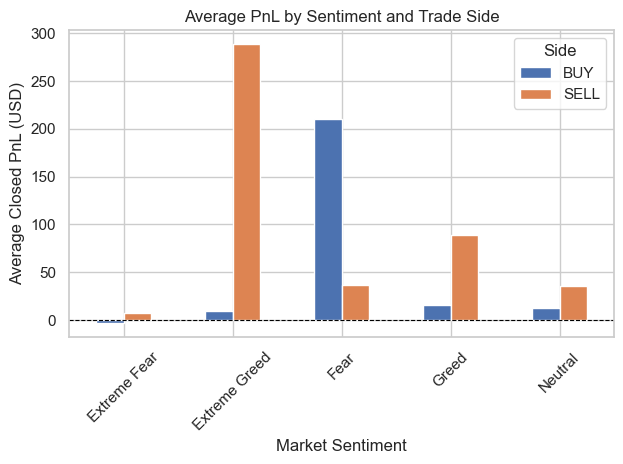

In [14]:
pnl_by_side_sentiment.plot(kind='bar', ax=plt.gca())
plt.title('Average PnL by Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL (USD)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.savefig('pnl_by_sentiment.png')
plt.show()



*   In Fear, BUY trades do best. In Greed, SELL trades do best.
*   Buy during Fear.
*   Sell during Greed.
*   Avoid buying in Greed or selling in Fear.


Trader PnL Vs Numerical Sentiment Score

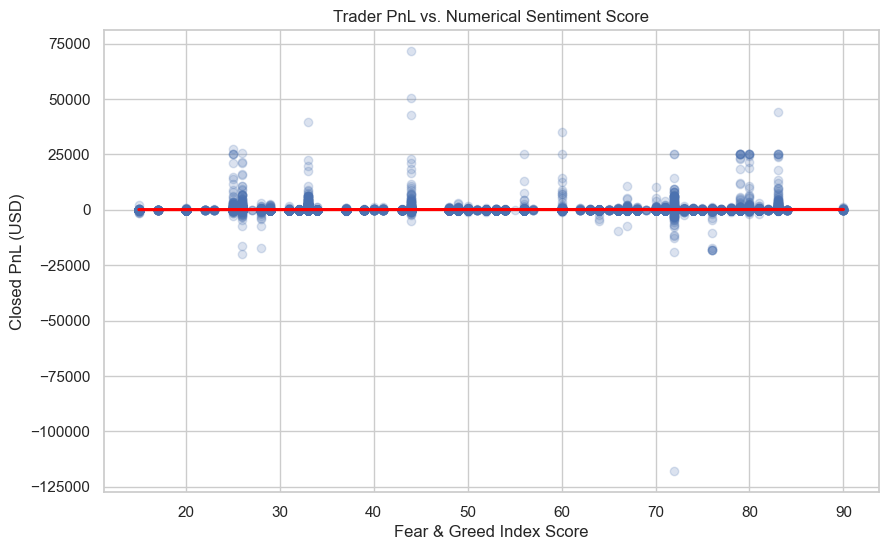

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='Sentiment Score', y='Closed PnL', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Trader PnL vs. Numerical Sentiment Score')
plt.xlabel('Fear & Greed Index Score')
plt.ylabel('Closed PnL (USD)')
plt.savefig('pnl_vs_sentiment_score.png')
plt.show()



*   High sentiment (75+) has high average profit but also many big losses.
*   Tighten risk controls when sentiment > 75.
*   Favor long positions when sentiment < 25.

